# Homework 3
Due by 10/12/15 at 11:59pm EST

-----------





In [4]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

## Problem 1 Regression (20 pts) 

### Problem 1a 

Compare different models for the regressionP1.txt file where you are to model output given combinations of the x1, x2, and x3 variables and find the best model.  Note that you can include not only the individual variables but the 2- and 3-way interactions that use the format x1:x2 or x1:x2:x3.  How did you determine the best model?


                            OLS Regression Results                            
Dep. Variable:                 output   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.941e+04
Date:                Sun, 11 Oct 2015   Prob (F-statistic):          4.78e-300
Time:                        14:21:00   Log-Likelihood:                -511.20
No. Observations:                 214   AIC:                             1028.
Df Residuals:                     211   BIC:                             1038.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.7927      0.068     11.574      0.0

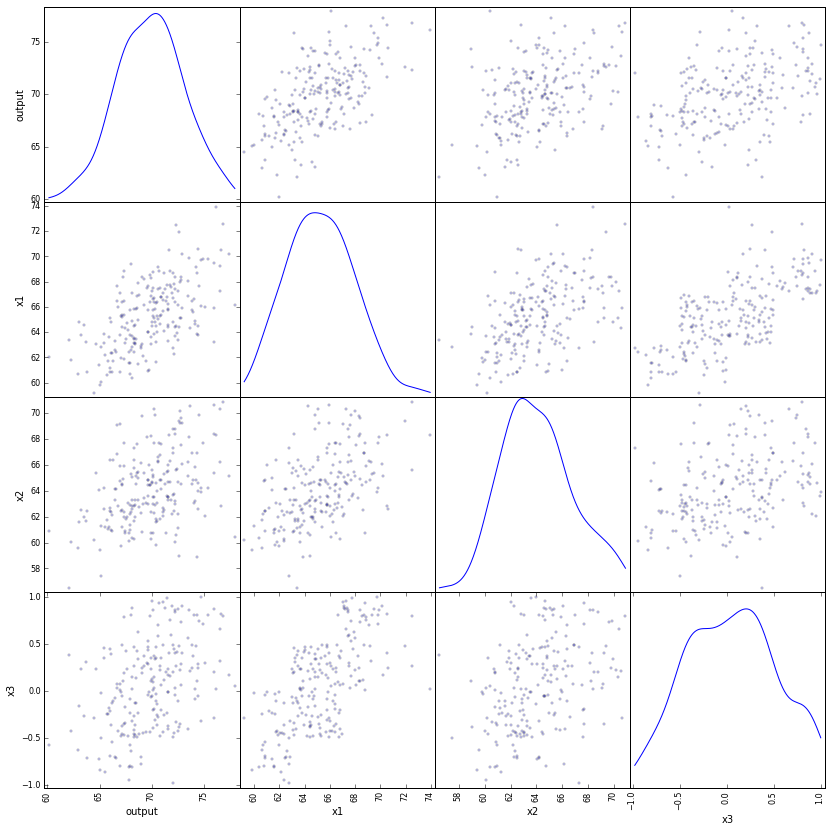

In [199]:
import statsmodels.api as sm

## import data
d1 = pd.read_csv('regressionP1.txt', sep='\t')
y = d1['output']

## scatter matrix
pd.scatter_matrix(d1, alpha=0.2, figsize=(14,14), diagonal='kde')

## add interaction terms
d1['x1*x2'] = d1['x1'] * d1['x2']
d1['x1*x3'] = d1['x1'] * d1['x3']
d1['x2*x3'] = d1['x2'] * d1['x3']

## model 1: all x
x = d1[['x1', 'x2', 'x3']]
model = sm.OLS(y, x)
result = model.fit()
print(result.summary())

## model 2: all x and interactions
x = d1[['x1', 'x2', 'x3', 'x1*x2', 'x1*x3', 'x2*x3']]
model = sm.OLS(y, x)
result = model.fit()
print(result.summary())


## RESULT:
## In both models, there are x1, x2, and x1*x2 that have significant coefficients. We can leave out x3
## In the next step, we should try to compare model x1, x2, vs. x1, x2, x1*x2

In [200]:
## model 3: drop x3
y = d1['output']
x3 = d1[['x1', 'x2']]
model3 = sm.OLS(y, x3)
result3 = model3.fit()
print('\nModel 3:')
print(result3.summary())

## model 4: x1, x2, and x1*x2
x4 = d1[['x1', 'x2', 'x1*x2']]
model4 = sm.OLS(y, x4)
result4 = model4.fit()
print('\nModel 4:')
print(result4.summary())


print("\nModel 3 is best model. Although Model 4 might fit the training data better. Adding another term (interaction term) \
\nmay cause an overfitting problem. Larger models tend to have higher variance and therefore might not explain \
\nthe future data well although it explains the training data perfectly. \
\nAlso, Model 3 has higher AIC and BIC so we should pick Model 3")


Model 3:
                            OLS Regression Results                            
Dep. Variable:                 output   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.338e+04
Date:                Sun, 11 Oct 2015   Prob (F-statistic):          7.33e-302
Time:                        14:21:01   Log-Likelihood:                -512.77
No. Observations:                 214   AIC:                             1030.
Df Residuals:                     212   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.7607      0.066     11.46

### Problem 1b
Using the best model from 1a), analyze the regression assumptions.  This should include at least a histogram of the residuals, residuals as a function of the output, and a q-q plot.  

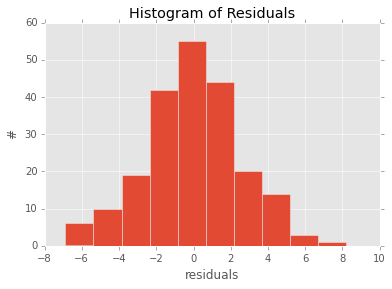

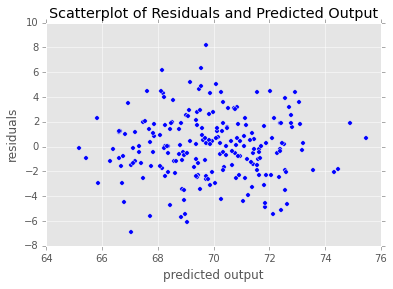

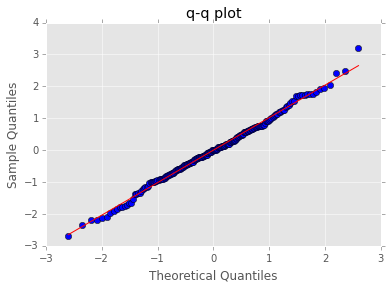

From the histogram, we can see that the normality assumption is satisfied as the histogram shows a bell-shaped curve. 
The q-q plot also confirms that the distribution is normal. 
From the scatterplot of predicted output and residuals, we can see that points are quite scattered and no pattern 
can be detected. This shows that the data are not likely to have a heteroskedasticity and outlier.


In [201]:
x3 = d1[['x1', 'x2']]
model3 = sm.OLS(y, x3)
result3 = model.fit()

with plt.style.context('ggplot'):
    
    ## histogram of residuals
    plt.hist(result3.resid)
    plt.title('Histogram of Residuals')
    plt.xlabel('residuals')
    plt.ylabel('#')
    plt.show()

    ## residuals and predicted output
    plt.scatter(result3.predict(), result3.resid)
    plt.title('Scatterplot of Residuals and Predicted Output')
    plt.xlabel('predicted output')
    plt.ylabel('residuals')
    plt.show()

    ## q-q plot
    fig = sm.qqplot(result3.resid, fit=True, line='r')
    plt.title('q-q plot')
    plt.show()
    
print("From the histogram, we can see that the normality assumption is satisfied as the histogram shows a bell-shaped curve. \
\nThe q-q plot also confirms that the distribution is normal. \
\nFrom the scatterplot of predicted output and residuals, we can see that points are quite scattered and no pattern \
\ncan be detected. This shows that the data are not likely to have a heteroskedasticity and outlier.")

## Problem 2  Hierarchical Clustering (15 pts)

A set of data has the following distance matrix.  Use the distance matrix approach to cluster this data by hand or using python calculations.  Produce the following output of the form for a hierarchical clustering using the Centroid based clustering. 

HigherCol     LowerCol     distance


<img src='distmtx.png'>

In [202]:
from scipy.cluster.hierarchy import dendrogram, linkage, centroid
import scipy.spatial.distance as ds

## function to recalculate distance
def calcDist(i, j, dist_ik, dist_jk, dist_ij):
    ai = i / (i + j)
    aj = j / (j + i)
    b = -(i * j)/(i + j)**2
    return (ai * dist_ik) + (aj * dist_jk) + (b * dist_ij)

## function to merge points
def findMin(beg=0, end=10):
    p = np.argmin(Y[beg:end]) + beg
    dist = Y[p]
    pair = Y_dict[p]
    return {"d": dist,  "row": pd.DataFrame([[pair[2], pair[0], dist]], columns=col)}
    
## define dictionary and condensed distance matrix
Y_dict = {0: "A:B", 1: "A:C", 2:"A:D", 3:"A:E", 
          4: "B:C", 5: "B:D", 6:"B:E", 
          7: "C:D", 8: "C:E", 
          9: "D:E"}
Y = np.array([1.1, 2.4, 0.1, 1.5, 
               1.3, 1, 0.4, 
               2.3, 0.9, 
               1.4])
col = ['HigherCol', 'LowerCol', 'distance']
Q2res = pd.DataFrame(columns=col)

## 1st Merge -> A:D
minpoint = findMin(0)
Q2res = Q2res.append(minpoint["row"])
dist_ij = minpoint["d"]

## 1st update distance matrix (use highercol) 
DA_B = calcDist(1, 1, Y[5], Y[0], dist_ij)
DA_C = calcDist(1, 1, Y[7], Y[1], dist_ij)
DA_E = calcDist(1, 1, Y[9], Y[3], dist_ij)
Y[5] = DA_B
Y[7] = DA_C
Y[9] = DA_E

## 2nd Merge -> B:E
minpoint = findMin(4) #exclude A (first 4)
Q2res = Q2res.append(minpoint["row"])
dist_ij = minpoint["d"]

## 2nd update distance matrix (use highercol)
EB_C = calcDist(1, 1, Y[8], Y[4], dist_ij)
EB_DA = calcDist(1, 1, Y[9], Y[6], dist_ij)
Y[8] = EB_C
Y[9] = EB_DA

## 3rd Merge -> D:E
minpoint = findMin(7) #exclude A,B (first 7)
Q2res = Q2res.append(minpoint["row"])
dist_ij = minpoint["d"]

## 3rd update distance matrix (use highercol)
EBDA_C = calcDist(2, 2, Y[8], Y[7], dist_ij)
Y[8] = EBDA_C

## 4th Merge ->
minpoint = findMin(8,9) #exclude A,B,D (first 9)
Q2res = Q2res.append(minpoint["row"])
dist_ij = minpoint["d"]

## print result
print(Q2res)

  HigherCol LowerCol  distance
0         D        A  0.100000
0         E        B  0.400000
0         E        D  0.812500
0         E        C  1.459375



## Problem 3  Gradient Search (15 pts)



### Problem 3a  

Use a gradient search approach to find the minimum value of:

f(x,y,z) = (z-3x)4 exp(x-y) + (3x + y + 2z + 7)2exp(y-z)

The gradient of the function is [dx dy dz] defined below. 

dx:	 -12(z-3x)3 exp(x-y) + (z-3x)4 exp(x-y) + 6(3x + y + 2z + 7)exp(y-z)

dy:	(z-3x) 4 exp(x-y)(-1) + 2(3x + y + 2z + 7)exp(y-z) + (3x+y+2z+7)2exp(y-z)

dz:	4(z-3x)3 exp(x-y) + 4(3x + y + 2z + 7)exp(y-z) - (3x + y + 2z + 7)2exp(y-z)

Start at least with [x=-1 y=0 z=1] and explore different learning rates (alpha).  How sensitive is the gradient to the initial starting point?


In [5]:
def calcCost(x, y, z):
    cost = (((z - (3 * x))**4) * np.exp(x - y)) + \
    ((((3 * x) + y + (2 * z) + 7)**2) * np.exp(y - z))
    return cost

def calcGrad(x, y, z):
    x_grad = ((12 * ((z - (3 * x))**3) * np.exp(x - y)) *(-1))  + \
    (((z - (3 * x))**4) * np.exp(x - y)) + \
    (6 * ((3 * x) + y + (2 * z) + 7) * np.exp(y - z))
    
    y_grad = ((((z - (3 * x))**4) * np.exp(x - y)) * (-1)) + \
    (2 * ((3 * x) + y + (2 * z) + 7) * np.exp(y - z)) + \
    ((((3 * x) + y + (2 * z) + 7)**2) * np.exp(y - z))
    
    z_grad = (4 * ((z - (3 * x))**3) * np.exp(x - y)) + \
    (4 * ((3 * x) + y + (2 * z) + 7) * np.exp(y - z)) - \
    ((((3 * x) + y + (2 * z) + 7)**2) * np.exp(y - z))
    return [x_grad, y_grad, z_grad]

def stepGradient(x, y, z, alpha):
    grad = calcGrad(x, y, z)
    x_grad = grad[0]
    y_grad = grad[1]
    z_grad = grad[2]
    x = x - (alpha * x_grad)
    y = y - (alpha * y_grad)
    z = z - (alpha * z_grad)
    return [x, y, z]

def findGradient(x=-1, y=0, z=1, iterate=1000, alpha=0.01):
    cost = calcCost(x, y, z) #beginning cost
    for i in range(iterate):
        x_new, y_new, z_new = stepGradient(x, y, z, alpha) #find new points
        new_cost = calcCost(x_new, y_new, z_new) #calculate new cost
        if cost < new_cost: #check if no improvement
            print('find minimum cost')
            return [x, y, z, cost] #return previous points and cost
        else: #if improvement, then keep looping
            cost = new_cost
            x = x_new
            y = y_new
            z = z_new
    print('iteration ends')
    return [x, y, z, cost]

In [6]:
## using alpha = 0.01
print("\nusing alpha = 0.01")
result = findGradient(alpha=0.01)
print("x, y, z = " + str(result[0:3]))
print("cost = " + str(result[3]))

# using alpha = 0.008
print("\nusing alpha = 0.008")
result = findGradient(alpha=0.008)
print("x, y, z = " + str(result[0:3]))
print("cost = " + str(result[3]))

# using alpha = 0.007
print("\nusing alpha = 0.007")
result = findGradient(alpha=0.007)
print("x, y, z = " + str(result[0:3]))
print("cost = " + str(result[3]))

# using alpha = 0.007, 10000 iterations
print("\nusing alpha = 0.007, 10000 iterations")
result = findGradient(iterate=10000, alpha=0.007)
print("x, y, z = " + str(result[0:3]))
print("cost = " + str(result[3]))

# using alpha = 0.007, 20000 iterations
print("\nusing alpha = 0.007, 20000 iterations")
result = findGradient(iterate=20000, alpha=0.007)
print("x, y, z = " + str(result[0:3]))
print("cost = " + str(result[3]))

print("\nAt first starting with alpha = 0.01, the cost did not drop. This might indicate that the alpha is too big. \
\nThen reduce alpha to 0.008, we still get the same result. When reduce it further to 0.005, it gives a lower cost \
\n(0.079) but iterations end. \
\n\nI increased the number of iterations to 10000 and 20000 subsequently. It looks like the minimum approaches zero. \
\n The minimum point is x,y,z = [-0.045, -6.462, -0.131]")



using alpha = 0.01
find minimum cost
x, y, z = [-1, 0, 1]
cost = 107.420796822

using alpha = 0.008
find minimum cost
x, y, z = [-1, 0, 1]
cost = 107.420796822

using alpha = 0.007
iteration ends
x, y, z = [0.28840545187907757, -4.8076284946187231, 0.90132685164538628]
cost = 0.0786113553775

using alpha = 0.007, 10000 iterations
iteration ends
x, y, z = [0.04298019804780337, -6.3157205197279014, 0.13934686494984783]
cost = 0.00188166553495

using alpha = 0.007, 20000 iterations
iteration ends
x, y, z = [-0.045400875058921389, -6.4617581185469337, -0.13093085530617202]
cost = 3.54600656277e-05

At first starting with alpha = 0.01, the cost did not drop. This might indicate that the alpha is too big. 
Then reduce alpha to 0.008, we still get the same result. When reduce it further to 0.005, it gives a lower cost 
(0.079) but iterations end. 

I increased the number of iterations to 10000 and 20000 subsequently. It looks like the minimum approaches zero. 
 The minimum point is x,y,z = [

### Problem 3b

An extremely common error in gradient searches is that either the gradient equation or the implementation are wrong.  A quick check is to look at the neighborhood of a given start point.  For the starting point, verify that a point f(x+deltax, y+deltay, z+deltaz) is lower than f(x,y,z) where the  deltax, deltay, and deltaz are small numbers in the appropriate direction of the calculated gradient.

In [7]:
print("Calculate f(x, y, z) when delta is a small change (0.01) in the direction of gradient \
\ni.e. increase x, decrease y, decrease z \
\nWe should observe lower cost")

i = 0.01
x = -1
y = 0
z = 1
x_new = x + i
y_new = y - i
z_new = z - i
cost_old = calcCost(x, y, z)
cost_new = calcCost(x_new, y_new, z_new)

print('\nStarting Cost = ' + str(cost_old))
print('Cost after shift = ' + str(cost_new))
print('\nWe observed lower cost after a small shift in the direct of the gradient. \
\nThis indicates that the gradient descent is implemented correctly.')

Calculate f(x, y, z) when delta is a small change (0.01) in the direction of gradient 
i.e. increase x, decrease y, decrease z 
We should observe lower cost

Starting Cost = 107.420796822
Cost after shift = 105.537379963

We observed lower cost after a small shift in the direct of the gradient. 
This indicates that the gradient descent is implemented correctly.


## Problem 4  K-Modes (35 pts)


### Problem 4a  
Write a k-modes algorithm.  We suggest that you find a k-means algorithm available pretty much everywhere and adapt it to perform k-modes for categorical data.   

In [13]:
## original code from https://datasciencelab.wordpress.com/2013/12/12/clustering-with-k-means-in-python/

from scipy.stats import mode
from scipy.spatial.distance import hamming
from matplotlib import colors
import random

def cluster_points(X, L, mu):
    clusters  = {}
    labels = {}
    for j in range(len(X)):
        ## use hamming distance to find nearest cluster
        bestmukey = min([(i[0], np.linalg.norm(hamming(X[j],mu[i[0]]))) for i in enumerate(mu)], key=lambda t:t[1])[0]
        try:
            clusters[bestmukey].append(X[j])
        except KeyError:
            clusters[bestmukey] = [X[j]]
            
        ## update in labels
        try:
            labels[bestmukey].append(L[j])
        except KeyError:
            labels[bestmukey] = [L[j]]
        
    return (clusters, labels)
 
def reevaluate_centers(mu, clusters):
    newmu = []
    keys = sorted(clusters.keys())
    for k in keys:
        ## use mode instead of mean
        mod = mode(clusters[k], axis=0)
        mod = mod[0][0]
        newmu.append(mod) 
    return newmu
 
def has_converged(mu, oldmu):
    return (set([tuple(a) for a in mu]) == set([tuple(a) for a in oldmu]))
 
def findKModes(X, L, K):
    # Initialize to K random centers
    oldmu = random.sample(X.tolist(), K)
    mu = random.sample(X.tolist(), K)
    while not has_converged(mu, oldmu):
        oldmu = mu
        # Assign all points in X to clusters
        results = cluster_points(X, L, mu)
        # Reevaluate centers
        mu = reevaluate_centers(oldmu, results[0])
    return(mu, results[0], results[1])

def plot2D(results):
    clusters = results[1]
    colorname = list(colors.cnames)
    print(len(clusters))

    for key, value in clusters.items():
        p = np.array(value)
        plt.scatter(p[:,0], p[:,1], c=colorname[key])
    
    c = results[0]
    c = np.array(c)
    plt.scatter(c[:,0], c[:,1], marker=(5,1))
    plt.show()

### Problem 4b  
Cluster the attached sponge data using your k-modes algorithm.  Recall that the mode is the most frequently occurring pattern in categorical data.  Note that the first column of this data set is a set of labels, not data points.  To show the results, print a list of the output column labels on separate lines.  That is if you find 3 clusters (a,b,c), (d), (e,f), the output should look like

a b c<br/>
d<br/>
e f<br/>


In [14]:
## import data and separate label and data
d4 = pd.read_csv('spongeP4.txt', sep='\t', header=None)
d4label = d4.ix[:,0]
d4data = d4.ix[:,1:]

## convert categorical features to integers, then convert to numpy array
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
d4conv = d4data.apply(le.fit_transform)
d4conv = np.array(d4conv)
d4label = np.array(d4label)

## find kmode - 2,3,4,5 clusters , choose K = 4 (see below for reasons)
k2 = findKModes(d4conv, d4label, 2)
k3 = findKModes(d4conv, d4label, 3)
k4 = findKModes(d4conv, d4label, 4)
k5 = findKModes(d4conv, d4label, 5)
k6 = findKModes(d4conv, d4label, 6)
for key,value in k4[2].items():
    print(value)
    print("")

['ALECTONA_MILLARI', 'CLIONA_CARTERI', 'CLIONA_CELATA', 'CLIONA_LABYRINTHICA', 'CLIONA_SCHMIDTI', 'CLIONA_VIRIDIS', 'DIPLASTRELLA_BISTELLATA', 'DIPLASTRELLA_ORNATA', 'LAXOSUBERITES_ECTYONIMUS', 'LAXOSUBERITES_FERRERHERNANDEZI', 'LAXOSUBERITES_RUGOSUS', 'OXYCORDYLA_PELLITA', 'PROSUBERITES_EPIPHYTUM', 'PROSUBERITES_LONGISPINA', 'PROSUBERITES_RUGOSUS', 'PSEUDOSUBERITES_HYALINUS', 'PSEUDOSUBERITES_SULFUREUS', 'RHIZAXINELLA_BISETA', 'RHIZAXINELLA_ELONGATA', 'RHIZAXINELLA_PYRIFERA', 'RHIZAXINELLA_UNISETA', 'SPIRASTRELLA_CUNCTATRIX', 'SPIRASTRELLA_MINAX', 'STYLOCORDYLA_BOREALIS', 'SUBERITES_CARNOSUS_V.INCRUSTANS', 'SUBERITES_CARNOSUS_V.RAMOSUS', 'SUBERITES_CARNOSUS_V.TYPICUS', 'SUBERITES_DOMUNCULA', 'SUBERITES_FICUS', 'SUBERITES_GIBBOSICEPS', 'TERPIOS_FUGAX', 'TETHYA_AURANTIUM', 'TETHYA_CITRINA', 'TIMEA_CHONDRILLOIDES', 'TIMEA_HALLEZI', 'TIMEA_MIXTA', 'TIMEA_STELLATA', 'TIMEA_UNISTELLATA']

['AAPTOS_AAPTOS', 'POLYMASTIA_AGGLUTINARIS', 'POLYMASTIA_CONIGERA', 'POLYMASTIA_FUSCA', 'POLYMASTIA_HIR

### Problem 4c
Justify your choice of k

In [15]:
## function to generate list of silhouettes
def findSilh(clusters_output):
    clusters = clusters_output[0]
    points = clusters_output[1]
    all_silhs = []

    # loop all clusters
    for c in range(len(clusters)):    
        cluster = clusters[c]
        other_clusters = clusters[:c] + clusters[c+1:]
        silhs = [] #create empty list for silhouettes

        # loop all points in clusters
        for i in range(len(points[c])):
            point = points[c][i]
            others = points[c][:i] + points[c][i+1:]

            # get a(i) -- find average hamming distance between a(i) and other q points in the same cluster
            sum = 0
            for q in others:
                sum += hamming(point, q)
            a = sum / len(others)

            # get b(i) -- find lowest average hamming distance between a(i) to q points in other clusters
            b_list = []
            for d in other_clusters: #find average hamming distance to each other cluster
                sum = 0
                for q in d:
                    sum += hamming(point, q)
                avg_dist = sum / len(d)
                b_list.append(avg_dist) #add to list
            b = min(b_list) #get the lowest one

            # calculate silhouette
            silh = (b - a) / max(a, b)
            silhs.append(silh) #add to list
        silhs.sort() #sort
        all_silhs.append(silhs) #add to list of all clusters
    return all_silhs


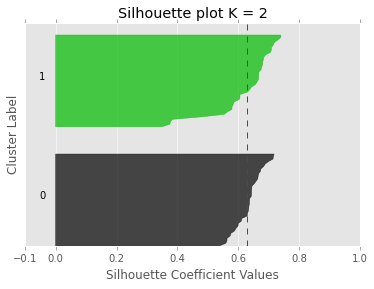

At K = 2, Average Silhouette Score = 0.628881365149
From the charts, silhouette score is increasing as we increase K. However, when K = 5, we can see that 
Some clusters have lower than average silhouette score. This indicates weak separation. As a result, I chose 
K = 4 as a choice of cluster


In [17]:
## Evaluate cluster performance of each K choice using Silhouette plot

## Silhouette calculation & plot
## Adapted from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
import matplotlib.cm as cm

def plotSilh(s):
    with plt.style.context('ggplot'):
        fig = plt.figure()
        n = len(s)
        y_lower = 10
        silh_avg = np.mean([x for list in s for x in list])
        for i in range(n): 
            cls = s[i]
            size = len(cls)
            y_upper = y_lower + size
            color = cm.spectral(float(i) / n)
            plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cls, facecolor=color, edgecolor=color, alpha=0.7)
            plt.text(-0.05, y_lower + 0.5 * size, str(i))
            y_lower = y_upper + 10

        plt.title('Silhouette plot K = ' + str(n))
        plt.xlabel('Silhouette Coefficient Values')
        plt.ylabel('Cluster Label')
        plt.axvline(x=silh_avg, color="red", linestyle="--")
        plt.yticks([])  
        plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.show()
    return "At K = " + str(n) + ", Average Silhouette Score = " + str(silh_avg)

k2 = findKModes(d4conv, d4label, 2)
k3 = findKModes(d4conv, d4label, 3)
k4 = findKModes(d4conv, d4label, 4)
k5 = findKModes(d4conv, d4label, 5)
k6 = findKModes(d4conv, d4label, 6)

s2 = findSilh(k2)
s3 = findSilh(k3)
s4 = findSilh(k4)
s5 = findSilh(k5)
s6 = findSilh(k6)
print(plotSilh(s2))
print(plotSilh(s3))
print(plotSilh(s4))
print(plotSilh(s5))
print(plotSilh(s6))


print("From the charts, silhouette score is increasing as we increase K. However, when K = 5, we can see that \
\nSome clusters have lower than average silhouette score. This indicates weak separation. As a result, I chose \
\nK = 4 as a choice of cluster")

## Problem 5 Gaussian Mixture Model (15 pts)

Clustering using K-Means and Gaussian Mixture Models.  Cluster the gmmDataP5.txt file using 4 clusters for each.  You may need to try multiple different starting locations to get a stable result.   We recommend using the the scikit-learn k-Means and mixture GMM for this, although the PyMix from section would be equivalent and acceptable (but needs the older Python 2.7).   How do the results of the clustering compare?    Print the mean and covariances for the GMM, and the centroids for the k-means.
Plotting the raw data points and ellipses for the GMM is useful but optional, but worth a few bonus points.


Centroids of K-Means
[[  7.4918543   15.68072848]
 [ 17.75318471  12.40942675]
 [  5.1798       5.8112    ]
 [ 22.11743902  14.08536585]]


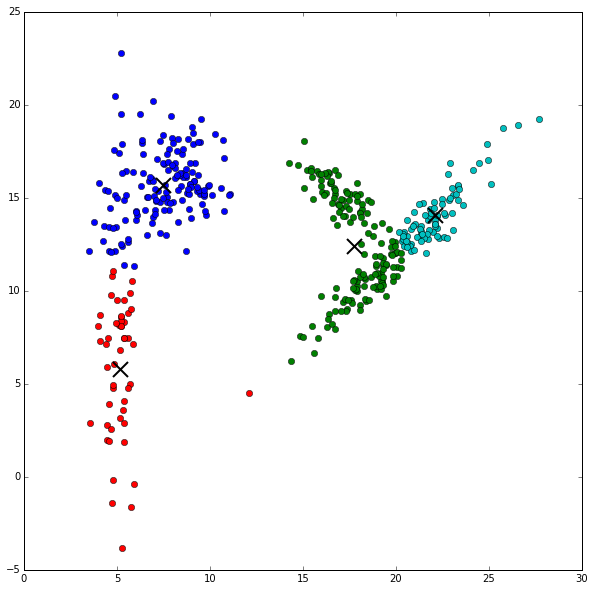

Means of GMM
[[  5.0053854    9.14819776]
 [ 17.02408713  15.04051714]
 [  8.10966431  15.93385639]
 [ 20.12020746  12.09270937]]
Covariance of GMM
[[[  0.31882917  -0.05966738]
  [ -0.05966738  28.8863442 ]]

 [[  1.3538413   -1.02292057]
  [ -1.02292057   1.26419041]]

 [[  1.82500554   0.21274975]
  [  0.21274975   2.33460323]]

 [[  5.90962065   5.69489823]
  [  5.69489823   6.03998683]]]


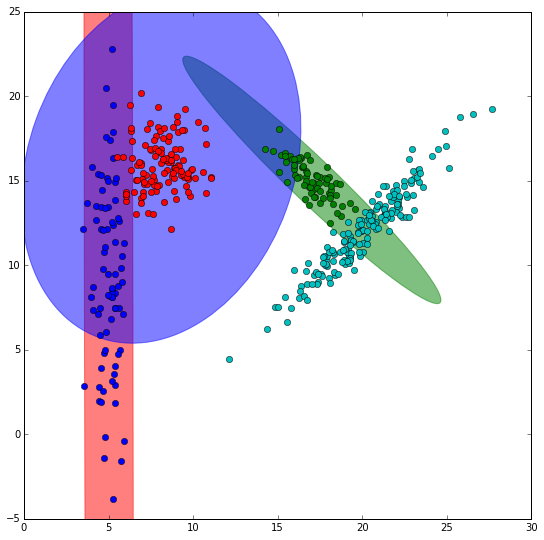


K-Means didn't do well with a long cluster and an odd-shaped cluster. From the chart, the blue cluster       
is supposed to be long, but K-Means group half of the points to the red cluster. Similarly, K-Means did not       
distinguish the long cluster on the right. It made an 'L-shaped' green cluster instead

When using full covariance GMM, long clusters are formed. We can notice that the ellipses are long-shaped       
indicating that long clusters is appropriate in this case


In [210]:
from sklearn.cluster import KMeans
from sklearn.mixture import GMM, DPGMM
import matplotlib as mpl
import itertools
from scipy import linalg

## import data
d5 = pd.read_csv('gmmDataP5.txt', sep='\t', header=None)
d5 = np.array(d5)
k = 4

## fit K-Means
kmeans = KMeans(init='random', n_clusters=k, n_init=30)
kmeans.fit(d5)
klabels = kmeans.labels_
kcentroids = kmeans.cluster_centers_
print("Centroids of K-Means")
print(kcentroids)

## plot K-Means
plt.figure(figsize=(10, 10))
for i in range(k):
    # plot data points
    dplt = d5[np.where(klabels==i)]
    plt.plot(dplt[:,0],dplt[:,1],'o')
    
    # plot centroids
    lines = plt.plot(kcentroids[i,0],kcentroids[i,1],'kx')
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)
plt.show()

## function to plot ellipses 
## original code from http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_classifier.html
def make_ellipses(gmm, ax):
    for n, color in enumerate('rgb'):
        v, w = np.linalg.eigh(gmm._get_covars()[n][:2, :2])
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v *= 9
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

# fit GMM with covariance_type = full 
gmm = GMM(n_components=k, n_init=30, covariance_type='full')
gmm.fit(d5)
glabels = gmm.predict(d5)
gmeans = gmm.means_
gcovar = gmm.covars_
print("Means of GMM")
print(gmeans)
print("Covariance of GMM")
print(gcovar)

plt.figure(figsize=(20, 20))
h = plt.subplot(2, k / 2, 1)
make_ellipses(gmm, h)

for i in range(k):
    # plot data points
    dplt = d5[np.where(glabels==i)]
    plt.plot(dplt[:,0],dplt[:,1],'o')

plt.show()

print("\nK-Means didn't do well with a long cluster and an odd-shaped cluster. From the chart, the blue cluster \
      \nis supposed to be long, but K-Means group half of the points to the red cluster. Similarly, K-Means did not \
      \ndistinguish the long cluster on the right. It made an 'L-shaped' green cluster instead")
print("\nWhen using full covariance GMM, long clusters are formed. We can notice that the ellipses are long-shaped \
      \nindicating that long clusters is appropriate in this case")

### Problem 5 Bonus question:
Write your own implementation of EM algorithm applied to the Gaussian Mixture Models.  Apply it to the same data set.  You do not have to generalize it to N dimensions—2 dimensions is sufficient for this problem if that is easier.  


In [18]:
from scipy.stats import multivariate_normal

## initialize 2 clusters with parameters mu, sigma, pi (random pick a point as mu)
def initialize(data, K):
    cols = len(data[0]) #count features
    rows = len(data) #count obs
    mu = np.zeros((K, cols)) #set mu matrix (row = clusters, col = features)
    sigma = []
    pi = np.ones(K) / K

    # loop for each cluster
    for k in range(K):
        idx = np.random.randint(0, rows) #random the point to be the mean of that cluster
        for col in range(cols):
            mu[k][col] = data[idx][col] #mu
        sigma.append(np.cov(data.transpose())) #sigma

    return [mu, sigma, pi]

# function for sum of Gaussian pdf (denomenator of the ric equation)
def denom(x, K, mu, sigma, pi):
    sum = 0
    for k in range(K):
        sum += pi[k] * multivariate_normal(mu[k], sigma[k]).pdf(x)
    return sum

# function to calculate log-likelihood (for converge)
def loglike(data, K, params):
    mu = params[0]
    sigma = params[1]
    pi = params[2]
    sum = 0
    for x in range(len(data)):
        sum += np.log(denom(data[x], K, mu, sigma, pi))
    return sum 

## Expectation: compute probability that point belongs to cluster c
def expect(data, K, params):
    mu = params[0]
    sigma = params[1]
    pi = params[2]
    rows = len(data) #count obs
    cprob = np.zeros((rows, K)) #set cluster assignment probability matrix (row = obs, col = clusters)

    # set cluster assignment probability for each datum (based on ric equation)
    for x in range(rows):
        for k in range(K):
            cprob[x][k] = pi[k] * multivariate_normal(mu[k], sigma[k]).pdf(data[x]) / denom(data[x], K, mu, sigma, pi)
    return cprob

## Maximization: update parameter using weighted data points
def maximize(data, K, cprob):
    cols = len(data[0]) #count features
    rows = len(data) #count obs
    mu = np.zeros((K, cols)) #set mu matrix (row = clusters, col = features)
    sigma = [] #set sigma matrix
    pi = np.zeros(K) #set pi matrix
    total_ric = np.zeros(K) #set total_ric matrix
    total_ricx = np.zeros((K, cols)) #set total ric*x matrix

    # loop for each cluster
    for k in range(K):
        for x in range(rows):
            total_ric += cprob[x][k] #sum ric
            total_ricx[k] += cprob[x][k] * data[x] #sum ric*x
        pi[k] = total_ric[k] / rows #find new pi            
        mu[k] = total_ricx[k] / total_ric[k] #find new mu

        sumsigma = 0
        for x in range(rows):
            x_minus_mu = np.zeros((1, cols)) #set x - mu matrix for each datum
            x_minus_mu = data[x] - mu[k] #find x - mu
            sumsigma += cprob[i][k] * x_minus_mu * x_minus_mu.transpose() #sum of x - mu square
        sigma.append(sumsigma / total_ric[k])
    return [mu, sigma, pi]

## Combine all EM (converged if maximize log-likelihood)
def em(data, K):
    params = initialize(data, K) #initialize parameters
    current_ll = loglike(data, K, params) #find initial log-likelihood
    
    # loop until converge
    iterate = 100
    for i in range(iterate):
        print(current_ll)
        cprob = expect(data, K, params) #expectation
        new_params = maximize(data, K, cprob) #maximization
        new_ll = loglike(data, K, new_params) #find new log-likelihood
        if (abs(new_ll - current_ll) < 100):
        #(new_ll > current_ll): # check if converge
            break
        else:
            current_ll = new_ll
            params = new_params
    return [current_ll, params[0], params[1], cprob]

## Assign final cluster using last cprob
def label(cprob):
    labels = np.zeros(len(cprob))
    for i in range(len(cprob)):
        if cprob[i][0] < cprob[i][1]:
            labels[i] = 0
        else:
            labels[i] = 1
    return labels
                   
## Run GMM
gmm_result = em(d5, 2)
labels = label(gmm_result[3])

## plot 
K = 2
for i in range(K):
    # plot data points
    dplt = d5[np.where(labels==i)]
    plt.plot(dplt[:,0],dplt[:,1],'o')
    plt.title("GMM K = 2, LL = " + str(gmm_result[0]))
plt.show()

print("\nMy own GMM implementation does not give a stable result because of the random initialization. \
\nRandom initialization affects how expectation-maximization loop converge. Most of the time, it does not produce \
\nthe same result.")

NameError: name 'd5' is not defined